# I - Un premier réseau de neurones

Notre objectif est de réaliser l'apprentissage supervisé de la fonction $x \mapsto f(x) = e^{2sin(x)}$

In [ ]:
import numpy as np                              # pour manipuler les données
import matplotlib.pyplot as plt                 # pour faire des affichages graphiques

from sklearn.metrics import mean_squared_error  # une metrique pour la fonction de perte

Nous allons d'abord nous doter de données d'apprentissage artificielles et puis définir un réseau de neurone :

In [ ]:
x = np.array([3*i/50 for i in range(-50,50)])     # input x
y = np.array([np.exp(2*np.sin(i)) for i in x])    # output f(x) = exp(2*sin(x))

Pour construire un réseau perceptron multi-couches le plus simplement possible, nous allons avoir recours à une structure "Sequential": https://keras.io/guides/sequential_model/, ce qui correspond au type de réseau auquel on s'intéresse, avec des couches denses : https://keras.io/api/layers/core_layers/dense/.

Il est possible de choisir une activation parmi plusieurs : https://keras.io/api/layers/activations/ . L' activation la plus restrictive est celle de la couche de sortie, car si elle est mal choisie, elle peut saboter la performance finale du réseau de neurones. Ici, puisque la sortie est positive et non majorée alors une activation finale ReLU est bienvenue.

In [ ]:
# Pour définir le réseau de neurones artificel "forward multi-perceptron"
from keras.models import Sequential
from keras.layers import Dense

activation = ['relu', 'sigmoid', 'softmax','tanh', 'LeakyReLU', 'selu', 'elu', 'exponential','...']

In [ ]:
model = Sequential()

# Couche d'entrée - le nombre de neurones doit être cohérent avec la problématique, ici apprendre f(x)=exp(2*sin(x))
model.add(Dense(100, input_dim=1, activation='relu', kernel_initializer='he_uniform'))

act = 'relu'
# Couches cachées - ici 7 couches
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))
model.add(Dense(100, activation=act, kernel_initializer='he_uniform'))

# Couche de sortie - le nombre de neurones doit être cohérent avec la problématique, ici apprendre f(x)=exp(2*sin(x))
model.add(Dense(1))

Nous choisissons comme fonction de perte l'erreur quadratique moyenne *mean squarred error (mse)* et ADAM comme algortihme d'optimisation. 

https://keras.io/api/optimizers/ 

https://keras.io/api/models/model_training_apis/

In [ ]:
# Apprentissage sur le jeu de donnée
model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=100, batch_size=10, verbose=1)

L erreur quadratique moyenne est :  0.003336504709096839


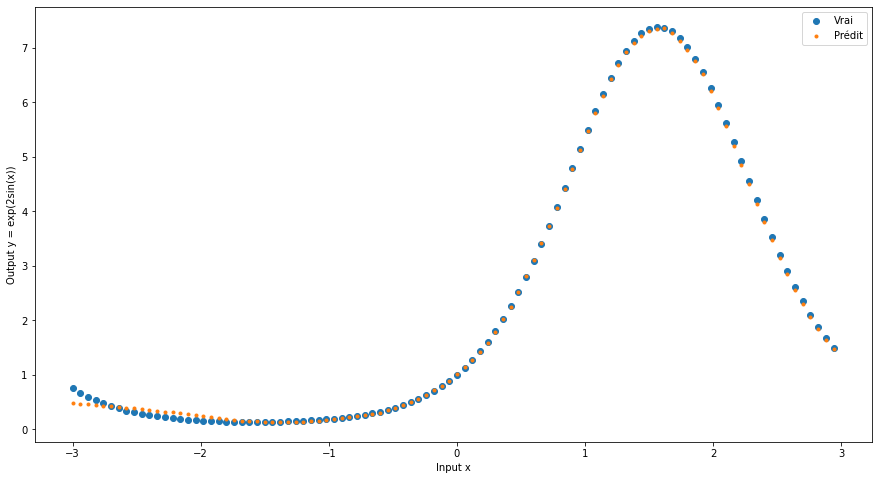

In [ ]:
y_train   = model.predict(x)

print('L erreur quadratique moyenne est : ', mean_squared_error(y_train, y))

plt.figure(figsize=(15,8))
plt.scatter(x,y, label='Vrai')
plt.scatter(x,y_train, label='Prédit',marker='.')
plt.title('')
plt.xlabel('Input x')
plt.ylabel('Output y = exp(2sin(x))')
plt.legend()

Modifions les points d'évaluation du réseau tout en restant sur le même support $[-3,3]$ afin de voir que le réseau n'a pas simplement retenu les valeurs de l'entrainement.

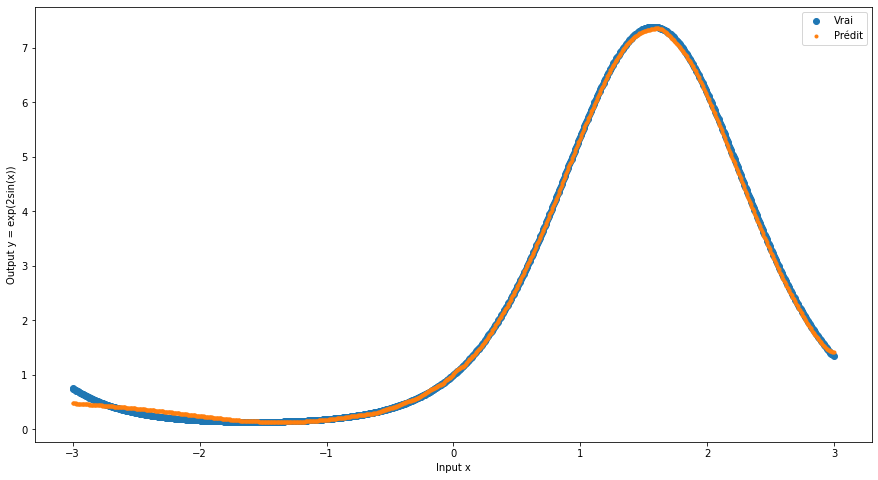

In [ ]:
x1      = np.array([3*i/500 for i in range(-500,500)]) 
y1      = np.exp(2*np.sin(x1))
y_test1 = model.predict(x1)


plt.figure(figsize=(15,8))
plt.scatter(x1,y1, label = 'Vrai')
plt.scatter(x1,y_test1, label='Prédit',marker='.')
plt.title('')
plt.xlabel('Input x')
plt.ylabel('Output y = exp(2sin(x))')
plt.legend()

Nous sommes plutôt satisfait de l'apprentissage sur le domaine $[-3,3]$. Il y'a certainement un sur-apprentissage mais nous ne nous penchons pas sur la question. 

Modifions les points d'évaluation du réseau pour le tester en dehors du support $[-3,3]$. On exhibe alors que l'approximation du réseau de neurones ne se généralise pas en dehors du support d'entrainement. 

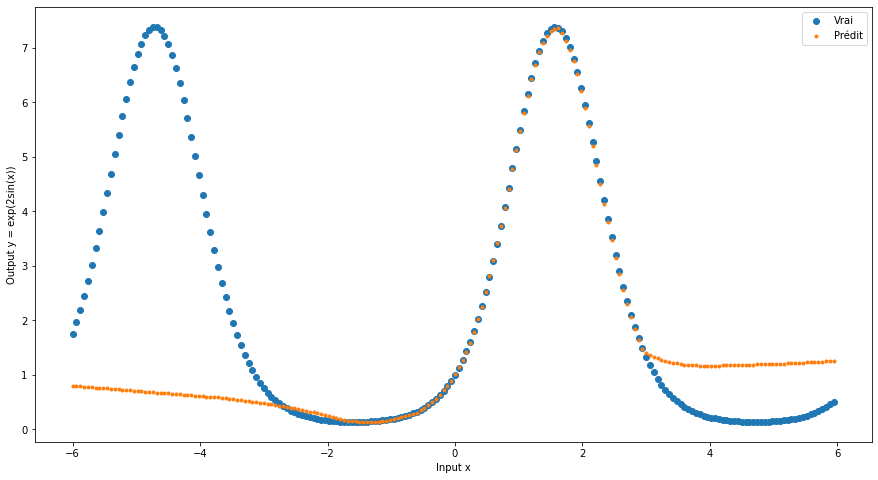

In [ ]:
x2      = np.array([3*i/50 for i in range(-100,100)]) 
y2      = np.exp(2*np.sin(x2))
y_test2 = model.predict(x2)


plt.figure(figsize=(15,8))
plt.scatter(x2, y2, label = 'Vrai')
plt.scatter(x2,y_test2, label='Prédit',marker='.')
plt.title('')
plt.xlabel('Input x')
plt.ylabel('Output y = exp(2sin(x))')
plt.legend()

# II - GAN sur données MNIST (handwritten dataset)

In [107]:
from keras.datasets import mnist

Discriminant : 
* Etant donné l'output qui doit être une probabilité, nous choisissons pour la dernière couche un seule neurone avec pour activation la fonction sigmoïd.
* Etant sur une problématique de classifcation, la métrique retnue pour le Discriminant est "Accuracy" = $\frac{prédictions.correctes}{nombre.total.de.prédiction}$

Générateur :
* 



Afin d'alléger le code, nous définissons en dehors de la classe *GANs* les fonctions *generateur* et *discriminant* que nous allons utiliser comme méthodes. 

In [108]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import sys

import tensorflow as tf

* https://keras.io/api/models/model/

* https://keras.io/api/layers/

* https://keras.io/api/layers/activations/

In [109]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization

In [110]:
def build_discriminator(self):
    model = Sequential() # réseau de neurones

    # Couche d'entrée
    model.add(Flatten(input_shape = self.dim_image))

    # Couches cachées
    model.add(Dense(512))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha = 0.2))

    # Couche de sortie 
    model.add(Dense(1, activation='sigmoid'))

    model.summary() # affiche le sommaire du réseau

    image       = Input(shape = self.dim_image)
    probabilite = model(image)

    return Model(inputs = image, outputs = probabilite)

In [111]:
def build_generateur(self):
    
    model = Sequential() #  réseau de neurones

    # Couche d'entrée
    model.add(Dense(256, input_dim = self.dim_espace_G))
    model.add(LeakyReLU(alpha=0.2))

    # Couches cachées
    model.add(BatchNormalization(momentum = 0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization(momentum = 0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization(momentum = 0.8))
    model.add(Dense(np.prod(self.dim_image), activation='tanh'))
    model.add(Reshape(self.dim_image))

    model.summary() # affiche le sommaire du réseau

    prior = Input(shape = self.dim_espace_G)
    image = model(prior)

    return Model(inputs = prior, outputs = image)

In [138]:
class GAN():
  def __init__(self):
      self.dim_image = (28, 28, 1) # taille d'une image 28x28x1
      self.dim_espace_G = 728      # dimension de l'espace de départ du générateur

  # 1/3 - GENERATEUR
      self.generateur = self.build_generateur()
      prior = Input(shape = self.dim_espace_G)
      image = self.generateur(prior)

  # 2/3 - DISCRIMINANT
      self.discriminant = self.build_discriminator()
      self.discriminant.compile(  loss     = tf.keras.losses.BinaryCrossentropy(),
                                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5, beta_2=0.999, epsilon=1e-07),
                                 metrics   = tf.keras.metrics.BinaryAccuracy())
      probabilite = self.discriminant(image)

  # 3/3 - GAN 
# Dans la phase d'entrainement nous allons d'abord entrainer le discriminant, puis à paramètres du discrimianat fixés, nous allons entrainer le générateur.
# Ainsi pour l'etape du generateur, nous allons specifier l'attribut du discriminant "trainable" à "False", pour n'entrainer que les couches du generateur.
      self.discriminant.trainable = False
      self.generative_adversarial_network = Model(prior, probabilite)
      self.generative_adversarial_network.compile(loss      = tf.keras.losses.BinaryCrossentropy(),
                                                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.5, beta_2=0.999, epsilon=1e-07))
      

  # Methodes pour etablir le generateur et le discriminant
  build_generateur     = build_generateur
  build_discriminator  = build_discriminator


  def images_generateur(self, epoch, n_epoch, ligne = 3, colonne = 4):
      """ 
    methode de la classe GAN : afficher des images generees par le generateur
    ----------
    Parametres:
    ligne, colonne       :
        int, int - nombre d'image par colonne et par ligne
    n_epoch              : 
        int - nombre d'interation d'entrainement
    batch_size           :
        int - demi-taille d'un jeu de donnees d'entrainement, compose de (batch_size vraies donnees, batch_size fausses donnees)
    """
      G_data  = self.generateur.predict(npr.normal(0, 1, (ligne * colonne, self.dim_espace_G)))
      image = 0.5 * G_data + 0.5 # rescale [0, 1]
      fig, axs = plt.subplots(ligne, colonne)
      cnt = 0
      for i in range(ligne):
        for j in range(colonne):
            axs[i,j].imshow(image[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
      plt.show()
      print('epoch', epoch, "/", n_epoch,'\n')

La manière dont la normailisation des données a une influence critique sur l'apprentissage du GAN. L'impact est observale sur les données générées par le générateur.

In [134]:
def APPRENTISSAGE(self, n_epoch, batch_size=100, affichage_intervalle=50):
      """ 
    methode de la classe GAN : Apprentissage ("training") du GAN par descente de gradient stochastique
    ----------
    Parametres:

    n_epoch              : 
        int - nombre d'interation d'entrainement
    batch_size           :
        int - demi-taille d'un jeu de donnees d'entrainement, compose de (batch_size vraies donnees, batch_size fausses donnees)
    affichage_intervalle :
        int - intervalle d'affichage
    """
      (X_train, y_train), (x_test, y_test) = mnist.load_data() # charger les données -> X_train.shape = (60000,28,28)
      X_train = 2*(X_train/255) - 1                            # Max-Min normalisation [-1,1], pour ameliorer l'apprentissage
      X_train = np.expand_dims(X_train, axis=3)                # X_train.shape = (60000,28,28,1) -> 60k echantillons de 28x28x1

      correct = np.ones((batch_size, 1))  # classification correcte - true label
      fake    = np.zeros((batch_size, 1)) # classication erronee    - fake label
      
      D_loss     = []
      D_accuracy = []
      G_loss     = []
      for epoch in range(n_epoch):

      #--- I - APPRENTISSAGE DISCRIMINANT

          # I - 1/2) Selction d'un mini-batch de données 
          index  = npr.randint(0, X_train.shape[0], batch_size)                               # selection aleatoire 
          T_data = X_train[index]                                                             # true - label
          G_data = self.generateur.predict(npr.normal(0, 1, (batch_size, self.dim_espace_G))) # fausses donnees du générateur, par transformation du prior gaussien standard - fake label
          # I - 2/2) Apprentissage du discriminant sur les données des mini-batch
          D_loss_true = self.discriminant.train_on_batch(x = T_data, y = correct) # - true label 
          D_loss_fake = self.discriminant.train_on_batch(x = G_data, y = fake)    # - fake label  
          D_loss.append(0.5*(D_loss_true[0] + D_loss_fake[0]))
          D_accuracy.append(0.5*(D_loss_true[1] + D_loss_fake[1])*100)


      #--- II - APPRENTISSAGE GENERATEUR
          g_loss = self.generative_adversarial_network.train_on_batch(x = npr.normal(0, 1, (batch_size, self.dim_espace_G)), y = correct)
          G_loss.append(g_loss)

            # If at save interval => save generated image samples
          if epoch % affichage_intervalle == 0:
                self.images_generateur(epoch, n_epoch)

      epoch = [e for e in range(n_epoch)]
      plt.figure(num = 0, figsize=(15,8))
      plt.plot(epoch, G_loss,     label='Generateur Loss',       marker='.', color = "blue")
      plt.plot(epoch, D_loss,     label='Discriminant Loss',     marker='.', color = "magenta")
      plt.title('Generateur Loss & Discriminant Loss')
      plt.xlabel('nb epochs')
      plt.ylabel('Loss')
      plt.legend()

      plt.figure(num = 1, figsize=(15,7))
      plt.plot(epoch, D_accuracy, label='Discriminant Accuracy', marker='.', color = "red")
      plt.title('Discriminant Accuracy')
      plt.xlabel('nb epochs')
      plt.ylabel('Pourcentage')
      plt.legend()


GAN.APPRENTISSAGE = APPRENTISSAGE

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_276 (Dense)           (None, 256)               186624    
                                                                 
 leaky_re_lu_197 (LeakyReLU)  (None, 256)              0         
                                                                 
 batch_normalization_117 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dense_277 (Dense)           (None, 512)               131584    
                                                                 
 leaky_re_lu_198 (LeakyReLU)  (None, 512)              0         
                                                                 
 batch_normalization_118 (Ba  (None, 512)              2048      
 tchNormalization)                                   

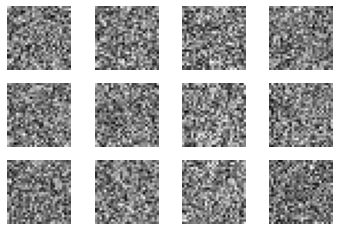

epoch 0 / 10000 



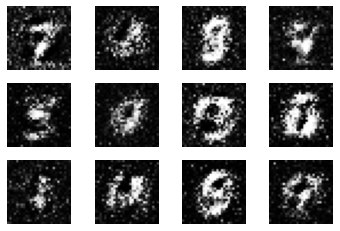

epoch 250 / 10000 



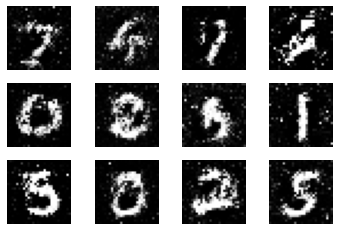

epoch 500 / 10000 



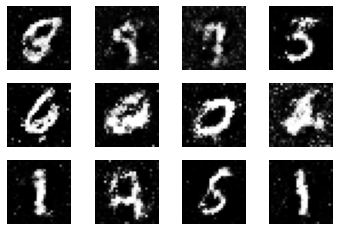

epoch 750 / 10000 



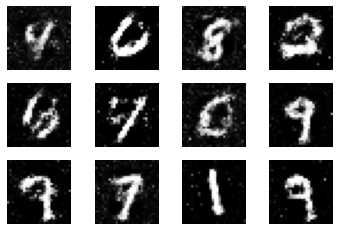

epoch 1000 / 10000 



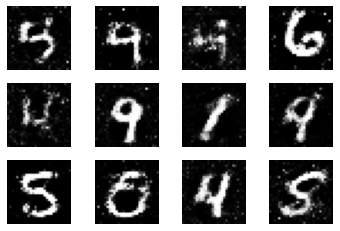

epoch 1250 / 10000 



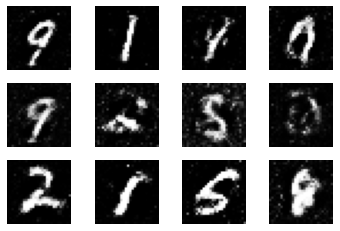

epoch 1500 / 10000 



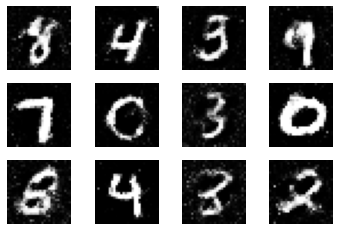

epoch 1750 / 10000 



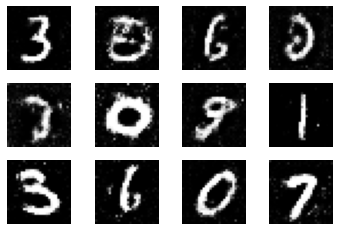

epoch 2000 / 10000 



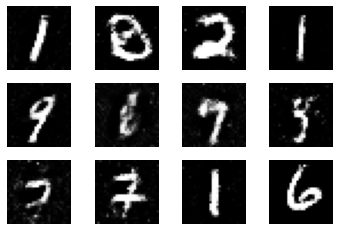

epoch 2250 / 10000 



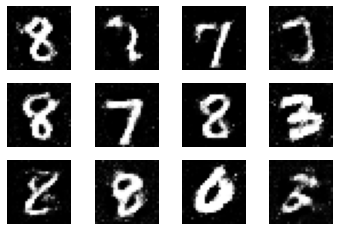

epoch 2500 / 10000 



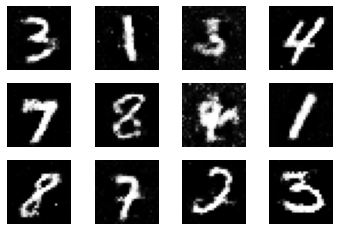

epoch 2750 / 10000 



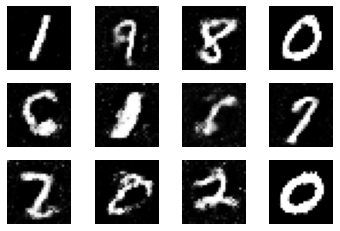

epoch 3000 / 10000 



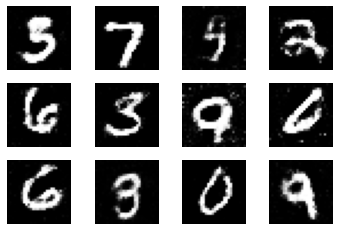

epoch 3250 / 10000 



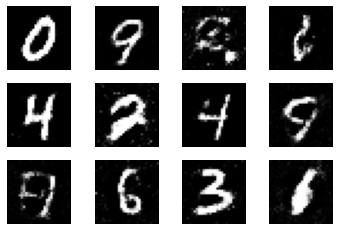

epoch 3500 / 10000 



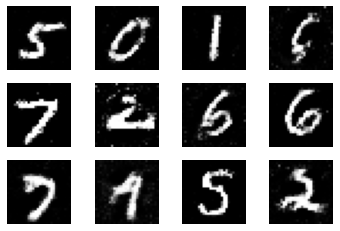

epoch 3750 / 10000 



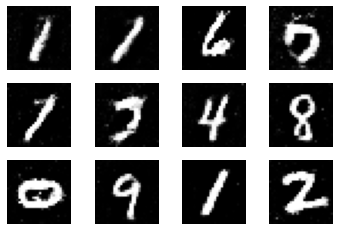

epoch 4000 / 10000 



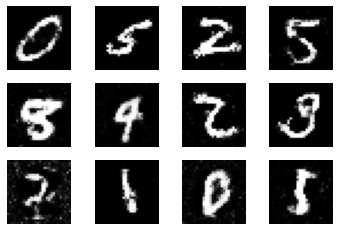

epoch 4250 / 10000 



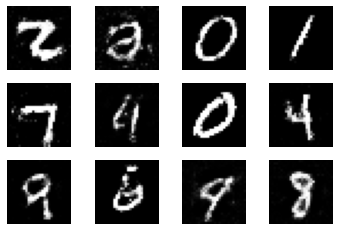

epoch 4500 / 10000 



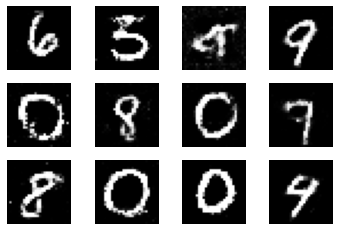

epoch 4750 / 10000 



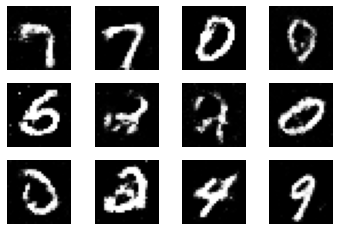

epoch 5000 / 10000 



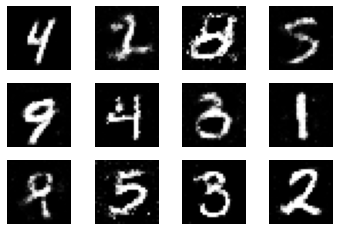

epoch 5250 / 10000 



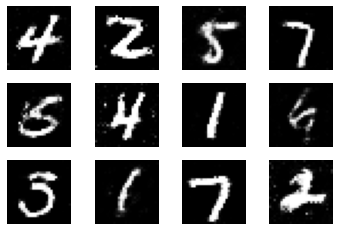

epoch 5500 / 10000 



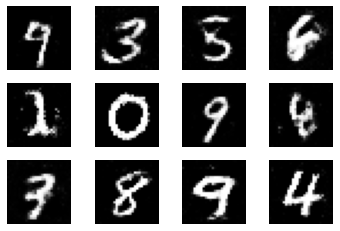

epoch 5750 / 10000 



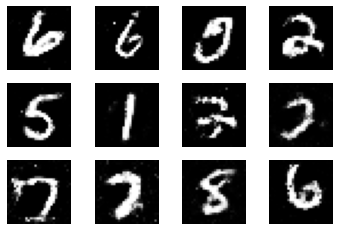

epoch 6000 / 10000 



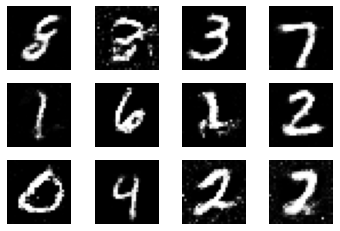

epoch 6250 / 10000 



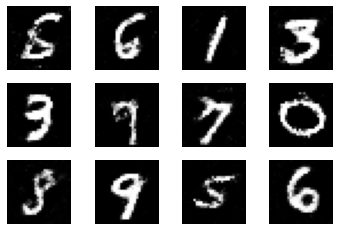

epoch 6500 / 10000 



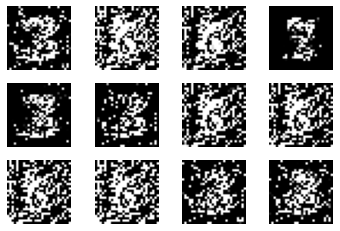

epoch 6750 / 10000 



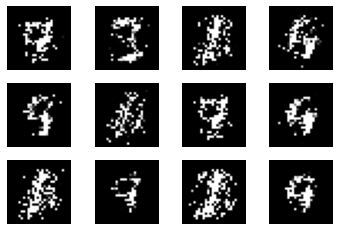

epoch 7000 / 10000 



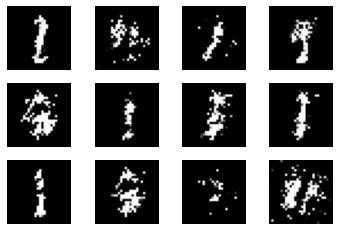

epoch 7250 / 10000 



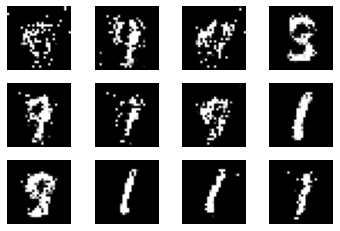

epoch 7500 / 10000 



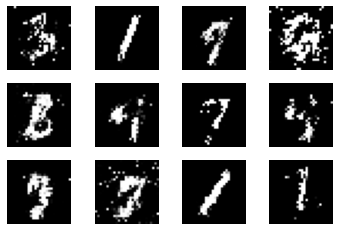

epoch 7750 / 10000 



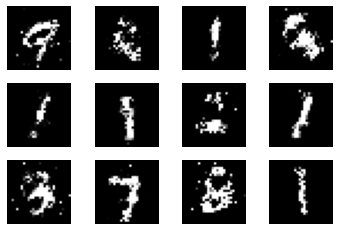

epoch 8000 / 10000 



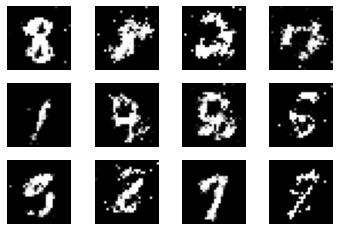

epoch 8250 / 10000 



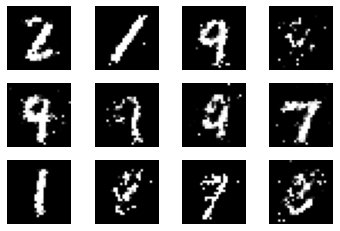

epoch 8500 / 10000 



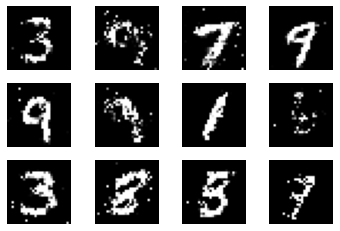

epoch 8750 / 10000 



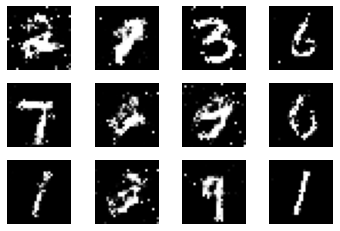

epoch 9000 / 10000 



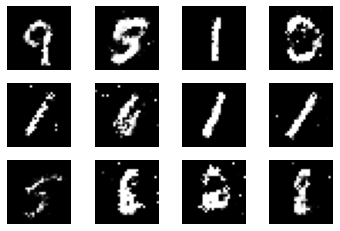

epoch 9250 / 10000 



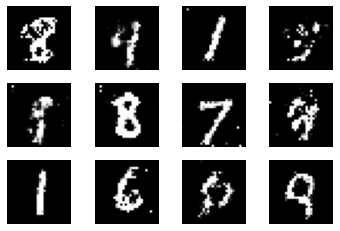

epoch 9500 / 10000 



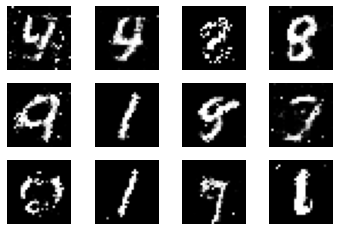

epoch 9750 / 10000 



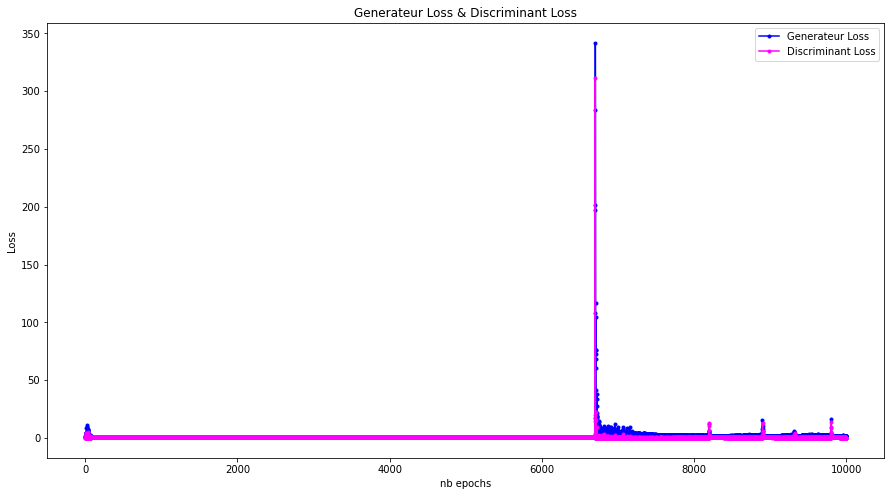

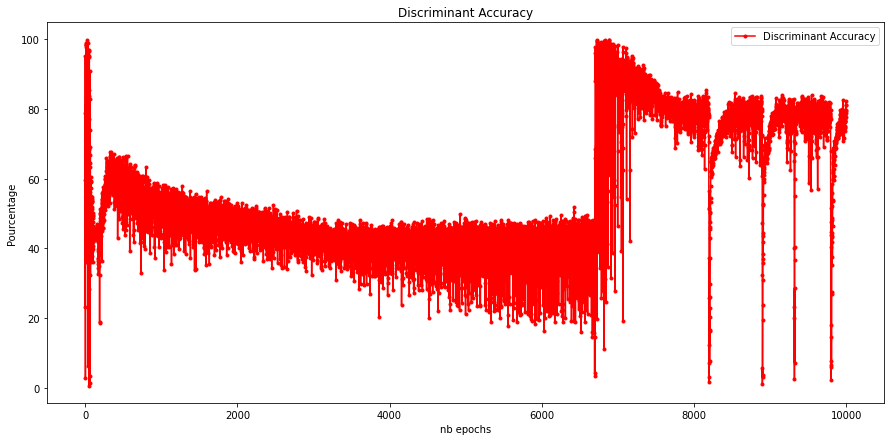

In [136]:
if __name__ == '__main__':
    gan = GAN()
    gan.APPRENTISSAGE(n_epoch=10000, batch_size=1000, affichage_intervalle=250)

In [140]:
print("Que s'est il passe autour de n_epoch = 6500 ??")

Que s'est il passe autour de n_epoch = 6500 ??
